# **Project Name**    - Aerial Object Detection and Classification

##### **Project Type**    -   Deep Learning, Streamlit
##### **Name**  - Gade Pavan Kumar Reddy

# **Project Summary -**

This project aims to solve a simple but important problem: telling whether an object in the sky is a bird or a drone. With drones becoming common and birds always sharing the same airspace, airports, security forces, and wildlife teams need quick and reliable identification to prevent accidents and safety issues.

To build this solution, deep learning models were trained on aerial images of birds and drones. We experimented with different approaches including a Custom CNN and advanced pre-trained models like ResNet50, MobileNetV2, and EfficientNetB0. After testing all models, MobileNetV2 stood out with 96% accuracy, showing that it can correctly recognize aerial objects in most situations.

To make the system more realistic, YOLOv8 was added for object detection, allowing the model not only to identify but also locate birds or drones in an image. Finally, a Streamlit app was created so anyone can upload an image and get instant results.

Overall, this project proves that AI can support safer skies and smarter surveillance with fast, accurate, and practical aerial object detection.

# **GitHub Link -**

https://github.com/pavangade31/Aerial-Object-Classification-and-Detection-Project/tree/main

# **Problem Statement**

With the growing use of drones and the natural presence of birds in the sky, identifying what is flying above has become important for safety and security. In places like airports, wildlife zones, and restricted airspace, confusing a drone with a bird can lead to serious issues such as security threats or bird-strike accidents. This project aims to build an intelligent deep learning system that can look at aerial images and accurately classify whether the object is a Bird or a Drone. Optionally, the system can also detect and locate these objects in real time using YOLOv8. The final solution will be deployed through a user-friendly Streamlit application, helping in surveillance, wildlife monitoring, and environment research where quick and correct identification matters the most.

## Step 1: Imports & Configuration

In [3]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import os
from pathlib import Path
from PIL import Image
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.applications import MobileNetV2,EfficientNetB0,ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 2: Data Preprocessing

In [5]:
img=cv2.imread('/content/drive/MyDrive/Labmentix Projects/11.Aerial Object Classification and Detection Project/test/bird/00083b384685315d_jpg.rf.abfd1b2cc8c681777bae66d5327bb9ea.jpg')

array([[[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       ...,

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]]], dtype=uint8)
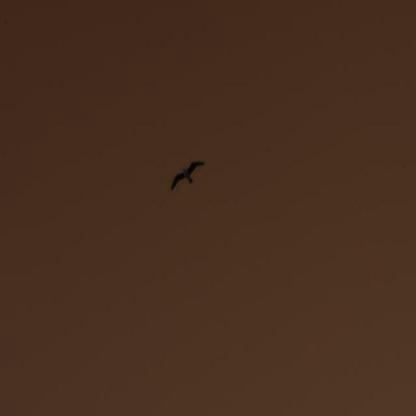

In [6]:
img

### 1.Horizontal Flipping

array([[[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [63, 40, 25],
        [63, 40, 25],
        [63, 40, 25]],

       [[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [63, 40, 25],
        [63, 40, 25],
        [63, 40, 25]],

       [[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [63, 40, 25],
        [63, 40, 25],
        [63, 40, 25]],

       ...,

       [[81, 55, 38],
        [81, 55, 38],
        [81, 55, 38],
        ...,
        [74, 48, 34],
        [74, 48, 34],
        [74, 48, 34]],

       [[81, 55, 38],
        [81, 55, 38],
        [81, 55, 38],
        ...,
        [74, 48, 34],
        [74, 48, 34],
        [74, 48, 34]],

       [[81, 55, 38],
        [81, 55, 38],
        [81, 55, 38],
        ...,
        [74, 48, 34],
        [74, 48, 34],
        [74, 48, 34]]], dtype=uint8)
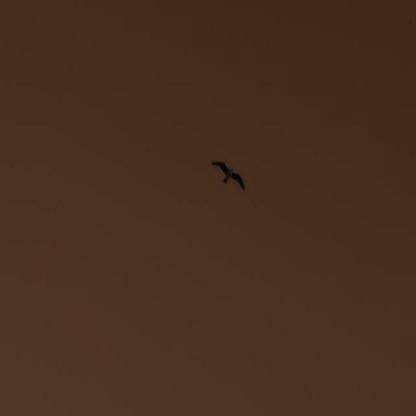

In [7]:
#Horizontal Flipping
cv2.flip(img,1)

### 2.Vertical Flipping

array([[[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       ...,

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]]], dtype=uint8)
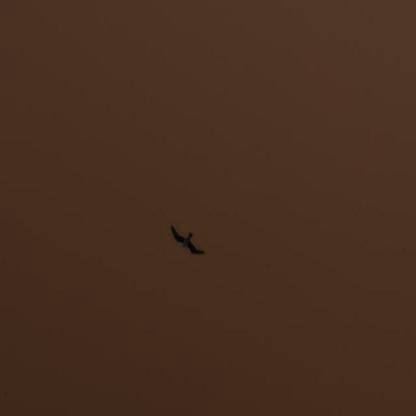

In [8]:
#Vertical Flipping
cv2.flip(img,0)

### 3.Rotating Image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
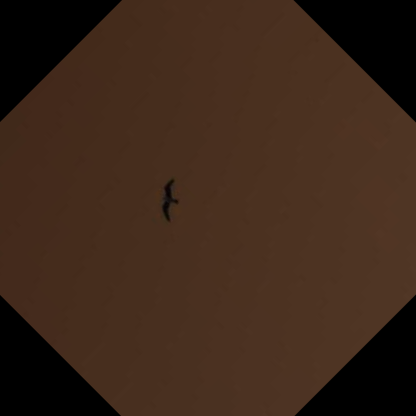

In [9]:
#Rotating Image
(h, w) = img.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0) # 45 degrees, 1.0 scale
rotated_image = cv2.warpAffine(img, M, (w, h))
rotated_image

### 4.Zoomed Image

array([[[72, 47, 31],
        [72, 47, 31],
        [72, 47, 31],
        ...,
        [73, 47, 31],
        [73, 47, 31],
        [73, 47, 31]],

       [[72, 47, 31],
        [72, 47, 31],
        [72, 47, 31],
        ...,
        [73, 47, 31],
        [73, 47, 31],
        [73, 47, 31]],

       [[72, 47, 31],
        [72, 47, 31],
        [72, 47, 31],
        ...,
        [73, 47, 31],
        [73, 47, 31],
        [73, 47, 31]],

       ...,

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [75, 49, 32],
        [75, 49, 32],
        [75, 49, 32]],

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [75, 49, 32],
        [75, 49, 32],
        [75, 49, 32]],

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [75, 49, 32],
        [75, 49, 32],
        [75, 49, 32]]], dtype=uint8)
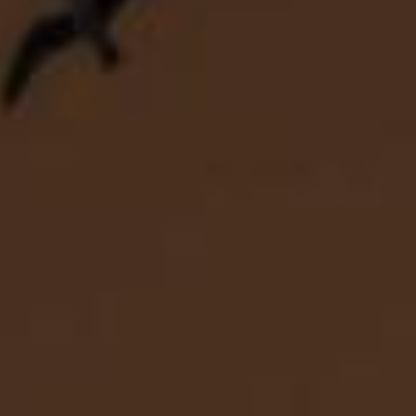

In [10]:
M = cv2.getRotationMatrix2D(center, 0, 5.5) # 0 degrees, 5.5 scale
zoomed_image = cv2.warpAffine(img, M, (w, h))
zoomed_image

### 5.Changing Brightness

array([[[124,  90,  68],
        [124,  90,  68],
        [124,  90,  68],
        ...,
        [134,  96,  72],
        [134,  96,  72],
        [134,  96,  72]],

       [[124,  90,  68],
        [124,  90,  68],
        [124,  90,  68],
        ...,
        [134,  96,  72],
        [134,  96,  72],
        [134,  96,  72]],

       [[124,  90,  68],
        [124,  90,  68],
        [124,  90,  68],
        ...,
        [134,  96,  72],
        [134,  96,  72],
        [134,  96,  72]],

       ...,

       [[141, 102,  81],
        [141, 102,  81],
        [141, 102,  81],
        ...,
        [152, 112,  87],
        [152, 112,  87],
        [152, 112,  87]],

       [[141, 102,  81],
        [141, 102,  81],
        [141, 102,  81],
        ...,
        [152, 112,  87],
        [152, 112,  87],
        [152, 112,  87]],

       [[141, 102,  81],
        [141, 102,  81],
        [141, 102,  81],
        ...,
        [152, 112,  87],
        [152, 112,  87],
        [152, 112,  87]]], dtype=uint8)
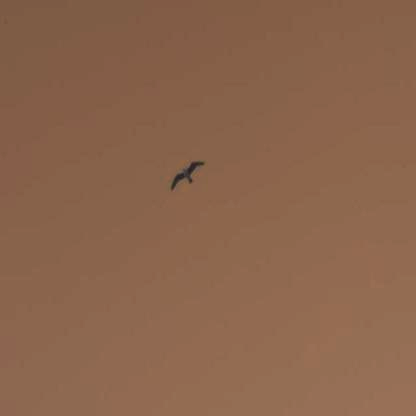

In [11]:
#Brightness
alpha = 1.5  # Contrast control range(1.0-3.0)
beta = 30    # Brightness control range(0-100)
adjusted_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
adjusted_image

### 6.Cropping Image

array([[[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [72, 46, 30],
        [72, 46, 30],
        [72, 46, 30]],

       [[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [72, 46, 30],
        [72, 46, 30],
        [72, 46, 30]],

       [[69, 44, 28],
        [69, 44, 28],
        [69, 44, 28],
        ...,
        [72, 46, 30],
        [72, 46, 30],
        [72, 46, 30]],

       ...,

       [[73, 47, 31],
        [73, 47, 31],
        [73, 47, 31],
        ...,
        [76, 50, 33],
        [76, 50, 33],
        [76, 50, 33]],

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [76, 50, 33],
        [76, 50, 33],
        [76, 50, 33]],

       [[74, 48, 32],
        [74, 48, 32],
        [74, 48, 32],
        ...,
        [76, 50, 33],
        [76, 50, 33],
        [76, 50, 33]]], dtype=uint8)
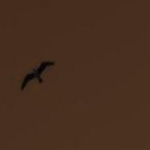

In [12]:
#image Cropping
img[100:250, 150:300]

### 7.Resizing Image

array([[[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       [[63, 40, 25],
        [63, 40, 25],
        [63, 40, 25],
        ...,
        [69, 44, 28],
        [69, 44, 28],
        [69, 44, 28]],

       ...,

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]],

       [[74, 48, 34],
        [74, 48, 34],
        [74, 48, 34],
        ...,
        [81, 55, 38],
        [81, 55, 38],
        [81, 55, 38]]], dtype=uint8)
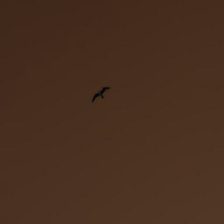

In [13]:
#resizing to (224,224)
cv2.resize(img, (224, 224))

## Step 3: Training Custom CNN Model

In [14]:
train_dir = "/content/drive/MyDrive/Labmentix Projects/11.Aerial Object Classification and Detection Project/train"
val_dir = "/content/drive/MyDrive/Labmentix Projects/11.Aerial Object Classification and Detection Project/valid"
test_dir = "/content/drive/MyDrive/Labmentix Projects/11.Aerial Object Classification and Detection Project/test"

In [15]:
img_size = (160, 160)
batch_size = 64

train_data = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
val_data = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)
test_data = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary'
)

Found 2662 files belonging to 2 classes.
Found 442 files belonging to 2 classes.
Found 215 files belonging to 2 classes.


## Step 4: Data Normalization

In [16]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data   = val_data.map(lambda x, y: (normalization_layer(x), y))
test_data  = test_data.map(lambda x, y: (normalization_layer(x), y))

train_data = train_data.cache().shuffle(500).prefetch(tf.data.AUTOTUNE)
val_data   = val_data.cache().prefetch(tf.data.AUTOTUNE)
test_data  = test_data.cache().prefetch(tf.data.AUTOTUNE)

# ============================
# Data Augmentation (GPU based)
# ============================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])

In [17]:
model = models.Sequential([
    layers.Input(shape=(160, 160, 3)),
    data_augmentation,

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid', dtype='float32')
])



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall()])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 36, 36, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,308,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,401,921 (20.61 MB)

 Trainable params: 5,401,921 (20.61 MB)

 Non-trainable params: 0 (0.00 B)

## Step 5: Defining Early Stopping

In [18]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "Custom_model.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)

## Step 6: Training the Model

In [19]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5490 - loss: 1.0576 - precision: 0.5312 - recall: 0.4896
Epoch 1: val_loss improved from inf to 0.59032, saving model to Custom_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.5511 - loss: 1.0448 - precision: 0.5330 - recall: 0.4914 - val_accuracy: 0.6991 - val_loss: 0.5903 - val_precision: 0.7347 - val_recall: 0.6400
Epoch 2/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7017 - loss: 0.5804 - precision: 0.7121 - recall: 0.6127
Epoch 2: val_loss improved from 0.59032 to 0.56391, saving model to Custom_model.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.7021 - loss: 0.5794 - precision: 0.7131 - recall: 0.6125 - val_accuracy: 0.7081 - val_loss: 0.5639 - val_precision: 0.6983 - val_recall: 0.7511
Epoch 3/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7501 - loss: 0.5135 - precision: 0.8010 - recall: 0.6333
Epoch 3: val_loss improved from 0.56391 to 0.54365, saving model to

- Best validation loss was 0.52991
- Trying to Improve my model by using Dropout layers, BatchNormalization

## Step 7: Custom Model Improvement

In [20]:
model = models.Sequential([

   # Block 1
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(160,160,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # Block 2
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    # Block 3
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.3),

    # Dense Layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall()])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 160, 160, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 160, 160, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 160, 160, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 160, 160, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80, 80, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 80, 80, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 80, 80, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 80, 80, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 80, 80, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 40, 40, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 40, 40, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    13,107,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,397,537 (51.11 MB)

 Trainable params: 13,396,129 (51.10 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [21]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 640ms/step - accuracy: 0.6423 - loss: 1.1212 - precision_1: 0.6322 - recall_1: 0.5877
Epoch 1: val_loss did not improve from 0.52991
42/42 ━━━━━━━━━━━━━━━━━━━━ 86s 906ms/step - accuracy: 0.6437 - loss: 1.1141 - precision_1: 0.6338 - recall_1: 0.5888 - val_accuracy: 0.4910 - val_loss: 1.0150 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 2/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.8085 - loss: 0.4324 - precision_1: 0.8138 - recall_1: 0.7526
Epoch 2: val_loss did not improve from 0.52991
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.8086 - loss: 0.4323 - precision_1: 0.8141 - recall_1: 0.7529 - val_accuracy: 0.4932 - val_loss: 0.6876 - val_precision_1: 1.0000 - val_recall_1: 0.0044
Epoch 3/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.8610 - loss: 0.3351 - precision_1: 0.8516 - recall_1: 0.8480
Epoch 3: val_loss did not improve from 0.52991
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8611



*   No Improvemnt in val_loss



In [22]:
best_model = keras.models.load_model("Custom_model.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7902 - loss: 0.4337 - precision: 0.7301 - recall: 0.8777
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7448 - loss: 0.5687 - precision: 0.6937 - recall: 0.8604 
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 8s/step - accuracy: 0.8289 - loss: 0.3810 - precision: 0.7958 - recall: 0.8408
Train Accuracy: 0.793012797832489
Train Precision: 0.7353139519691467
Train Recall: 0.8725961446762085
Train F1 Score: 0.798094521520284
Train Loss: 0.42828673124313354
                                     
Val Accuracy: 0.7511312365531921
Val Precision: 0.7121770977973938
Val Recall: 0.8577777743339539
Val F1 Score: 0.7782257907208864
Val Loss: 0.5299074053764343
                                     
Test Accuracy: 0.8093023300170898
Test Precision: 0.7476635575294495
Test Recall: 0.8510638475418091
Test F1 Score: 0.7960199117365457
Test Loss: 0.4204118847846985


## Step 8: Transfer Learning Models

### 1.MobileNetV2

In [23]:
# Loading Pretrained MobileNetV2
base_model = MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights="imagenet"
)

base_model.trainable = False  # Freezing weights

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,427,713 (9.26 MB)

 Trainable params: 166,913 (652.00 KB)

 Non-trainable params: 2,260,800 (8.62 MB)

In [24]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    "MobileNetV2.keras",
    monitor="val_loss",
    save_best_only=True,
    verbose=1
)
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 698ms/step - accuracy: 0.5913 - loss: 0.7939 - precision_2: 0.5672 - recall_2: 0.5964
Epoch 1: val_loss improved from inf to 0.38810, saving model to MobileNetV2.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.5939 - loss: 0.7893 - precision_2: 0.5697 - recall_2: 0.5992 - val_accuracy: 0.8213 - val_loss: 0.3881 - val_precision_2: 0.7417 - val_recall_2: 0.9956
Epoch 2/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8895 - loss: 0.2810 - precision_2: 0.8673 - recall_2: 0.8994
Epoch 2: val_loss improved from 0.38810 to 0.21733, saving model to MobileNetV2.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8898 - loss: 0.2801 - precision_2: 0.8677 - recall_2: 0.8997 - val_accuracy: 0.9072 - val_loss: 0.2173 - val_precision_2: 0.8622 - val_recall_2: 0.9733
Epoch 3/40
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9233 - loss: 0.1782 - precision_2: 0.9252 - recall_2: 0.9160
Epoch 3: val_loss improved from 0.21733 t

In [25]:
best_model = keras.models.load_model("MobileNetV2.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 26s 301ms/step - accuracy: 1.0000 - loss: 0.0122 - precision_2: 1.0000 - recall_2: 1.0000
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9719 - loss: 0.0852 - precision_2: 0.9601 - recall_2: 0.9834
4/4 ━━━━━━━━━━━━━━━━━━━━ 25s 8s/step - accuracy: 0.9667 - loss: 0.0723 - precision_2: 0.9600 - recall_2: 0.9672
Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0
Train Loss: 0.011554001830518246
                                     
Val Accuracy: 0.9751130938529968
Val Precision: 0.969298243522644
Val Recall: 0.9822221994400024
Val F1 Score: 0.9757174269932726
Val Loss: 0.07946522533893585
                                     
Test Accuracy: 0.9674418568611145
Test Precision: 0.9484536051750183
Test Recall: 0.978723406791687
Test F1 Score: 0.9633507849841338
Test Loss: 0.08486654609441757


### 2.EfficientNetB0

In [26]:
base_model2 = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=(160,160,3)
    )

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [27]:
base_model2.trainable = False  # Freezing weights

model = models.Sequential([
    base_model2,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 5, 5, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,219,300 (16.10 MB)

 Trainable params: 166,913 (652.00 KB)

 Non-trainable params: 4,052,387 (15.46 MB)

In [28]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    "EfficientNetB0.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5082 - loss: 0.9246 - precision_3: 0.4747 - recall_3: 0.4965
Epoch 1: val_loss improved from inf to 0.69226, saving model to EfficientNetB0.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.5088 - loss: 0.9229 - precision_3: 0.4754 - recall_3: 0.4975 - val_accuracy: 0.5090 - val_loss: 0.6923 - val_precision_3: 0.5090 - val_recall_3: 1.0000
Epoch 2/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5310 - loss: 0.8676 - precision_3: 0.4997 - recall_3: 0.5408
Epoch 2: val_loss did not improve from 0.69226
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5307 - loss: 0.8672 - precision_3: 0.4994 - recall_3: 0.5397 - val_accuracy: 0.5090 - val_loss: 0.6983 - val_precision_3: 0.5090 - val_recall_3: 1.0000
Epoch 3/40
40/42 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5317 - loss: 0.8351 - precision_3: 0.4875 - recall_3: 0.4774
Epoch 3: val_loss did not improve from 0.69226
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 25m

In [29]:
best_model = keras.models.load_model("EfficientNetB0.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 37s 425ms/step - accuracy: 0.4677 - loss: 0.6962 - precision_3: 0.4677 - recall_3: 1.0000
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.4902 - loss: 0.6943 - precision_3: 0.4902 - recall_3: 1.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 11s/step - accuracy: 0.4530 - loss: 0.6973 - precision_3: 0.4530 - recall_3: 1.0000
Train Accuracy: 0.4688204228878021
Train Precision: 0.4688204228878021
Train Recall: 1.0
Train F1 Score: 0.6383631594202223
Train Loss: 0.6959964036941528
                                     
Val Accuracy: 0.5090497732162476
Val Precision: 0.5090497732162476
Val Recall: 1.0
Val F1 Score: 0.6746626681919264
Val Loss: 0.6922589540481567
                                     
Test Accuracy: 0.4372093081474304
Test Precision: 0.4372093081474304
Test Recall: 1.0
Test F1 Score: 0.6084142451192378
Test Loss: 0.6987594366073608


### 3.ResNet50

In [30]:
base_model3 = ResNet50(
    weights='imagenet',
    include_top=False,
    input_shape=(160,160,3)
)
base_model3.trainable = False  # Freezing weights

model = models.Sequential([
    base_model3,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compiling Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy', Precision(), Recall()]
)

model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2048)           │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,858,817 (91.01 MB)

 Trainable params: 266,753 (1.02 MB)

 Non-trainable params: 23,592,064 (90.00 MB)

In [31]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=4,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint(
    "ResNet50.keras",
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.5450 - loss: 0.9396 - precision_4: 0.5010 - recall_4: 0.4378
Epoch 1: val_loss improved from inf to 0.67582, saving model to ResNet50.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 40s 521ms/step - accuracy: 0.5460 - loss: 0.9371 - precision_4: 0.5026 - recall_4: 0.4389 - val_accuracy: 0.5136 - val_loss: 0.6758 - val_precision_4: 0.5115 - val_recall_4: 0.9911
Epoch 2/40
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.6636 - loss: 0.6740 - precision_4: 0.6673 - recall_4: 0.5807
Epoch 2: val_loss improved from 0.67582 to 0.66476, saving model to ResNet50.keras
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6638 - loss: 0.6735 - precision_4: 0.6674 - recall_4: 0.5810 - val_accuracy: 0.5837 - val_loss: 0.6648 - val_precision_4: 0.9020 - val_recall_4: 0.2044
Epoch 3/40
41/42 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7012 - loss: 0.5915 - precision_4: 0.7121 - recall_4: 0.6049
Epoch 3: val_loss did not improve from 0.6647

In [32]:
best_model = keras.models.load_model("ResNet50.keras")
train_loss, train_acc, train_prec, train_rec = best_model.evaluate(train_data)
val_loss, val_acc, val_prec, val_rec = best_model.evaluate(val_data)
test_loss, test_acc, test_prec, test_rec = best_model.evaluate(test_data)
f1train = 2 * (train_prec * train_rec) / (train_prec + train_rec)
f1val = 2 * (val_prec * val_rec) / (val_prec + val_rec)
f1test = 2 * (test_prec * test_rec) / (test_prec + test_rec)
print("Train Accuracy:", train_acc)
print("Train Precision:", train_prec)
print("Train Recall:", train_rec)
print("Train F1 Score:", f1train)
print("Train Loss:", train_loss)
print("                                     ")
print("Val Accuracy:", val_acc)
print("Val Precision:", val_prec)
print("Val Recall:", val_rec)
print("Val F1 Score:", f1val)
print("Val Loss:", val_loss)
print("                                     ")
print("Test Accuracy:", test_acc)
print("Test Precision:", test_prec)
print("Test Recall:", test_rec)
print("Test F1 Score:", f1test)
print("Test Loss:", test_loss)

42/42 ━━━━━━━━━━━━━━━━━━━━ 15s 199ms/step - accuracy: 0.8300 - loss: 0.3863 - precision_4: 0.9019 - recall_4: 0.7284
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 478ms/step - accuracy: 0.8044 - loss: 0.4404 - precision_4: 0.8805 - recall_4: 0.6965
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7966 - loss: 0.4186 - precision_4: 0.8515 - recall_4: 0.6671
Train Accuracy: 0.8328324556350708
Train Precision: 0.904330313205719
Train Recall: 0.7195512652397156
Train F1 Score: 0.8014279239311766
Train Loss: 0.3864929974079132
                                     
Val Accuracy: 0.7918552160263062
Val Precision: 0.8799999952316284
Val Recall: 0.6844444274902344
Val F1 Score: 0.7699999874457716
Val Loss: 0.45811983942985535
                                     
Test Accuracy: 0.800000011920929
Test Precision: 0.8399999737739563
Test Recall: 0.6702127456665039
Test F1 Score: 0.745562107292303
Test Loss: 0.43111687898635864


## Step 9: Classification Report

In [33]:
def evaluate_model(model_path, test_data, model_name="Model"):
    print(f"\n Evaluation Results for: {model_name}")
    print("-" * 50)

    # Load model
    model = keras.models.load_model(model_path)

    # Extract true labels and images from dataset
    y_true = []
    x_data = []

    for batch_images, batch_labels in test_data:
        x_data.append(batch_images.numpy())
        y_true.append(batch_labels.numpy())

    x_data = np.concatenate(x_data)
    y_true = np.concatenate(y_true)

    # Predictions (probabilities → class)
    y_pred_prob = model.predict(x_data)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    # Classification Report
    print(classification_report(y_true, y_pred, target_names=["Bird", "Drone"]))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=["Bird", "Drone"],
                yticklabels=["Bird", "Drone"])
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return cm



 Evaluation Results for: Custom CNN
--------------------------------------------------
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
              precision    recall  f1-score   support

        Bird       0.87      0.78      0.82       121
       Drone       0.75      0.85      0.80        94

    accuracy                           0.81       215
   macro avg       0.81      0.81      0.81       215
weighted avg       0.82      0.81      0.81       215



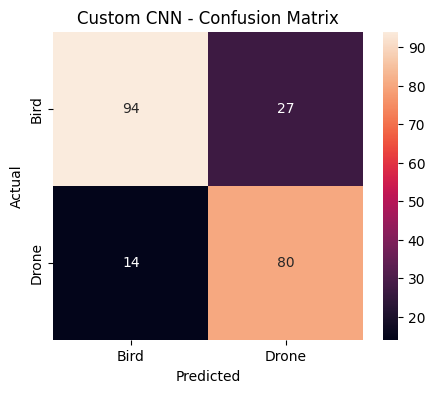


 Evaluation Results for: ResNet50 Transfer Learning
--------------------------------------------------
7/7 ━━━━━━━━━━━━━━━━━━━━ 12s 739ms/step
              precision    recall  f1-score   support

        Bird       0.78      0.90      0.84       121
       Drone       0.84      0.68      0.75        94

    accuracy                           0.80       215
   macro avg       0.81      0.79      0.80       215
weighted avg       0.81      0.80      0.80       215



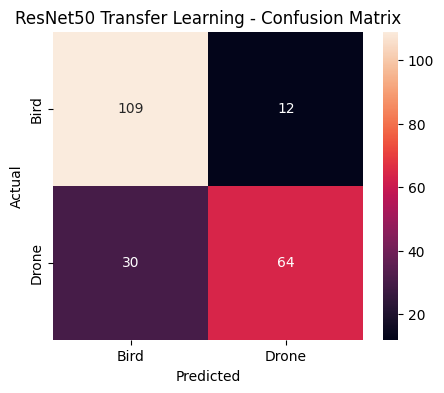


 Evaluation Results for: MobileNet Transfer Learning
--------------------------------------------------


7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step
              precision    recall  f1-score   support

        Bird       0.98      0.96      0.97       121
       Drone       0.95      0.98      0.96        94

    accuracy                           0.97       215
   macro avg       0.97      0.97      0.97       215
weighted avg       0.97      0.97      0.97       215



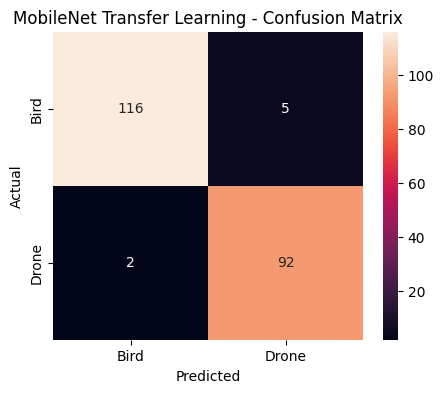


 Evaluation Results for: EfficientNetB0 Transfer Learning
--------------------------------------------------


7/7 ━━━━━━━━━━━━━━━━━━━━ 60s 4s/step
              precision    recall  f1-score   support

        Bird       0.00      0.00      0.00       121
       Drone       0.44      1.00      0.61        94

    accuracy                           0.44       215
   macro avg       0.22      0.50      0.30       215
weighted avg       0.19      0.44      0.27       215



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


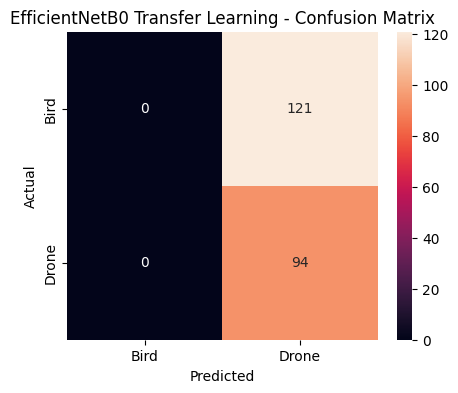

array([[  0, 121],
       [  0,  94]])

In [34]:
evaluate_model("Custom_model.keras", test_data, "Custom CNN")
evaluate_model("ResNet50.keras", test_data, "ResNet50 Transfer Learning")
evaluate_model("MobileNetV2.keras", test_data, "MobileNet Transfer Learning")
evaluate_model("EfficientNetB0.keras", test_data, "EfficientNetB0 Transfer Learning")

In [35]:
model = tf.keras.models.load_model("MobileNetV2.keras")

# Save model in .h5 format
model.save("MobileNetV2.h5")

print("Model saved as MobileNetV2.h5 successfully!")

Model saved as MobileNetV2.h5 successfully!


In [39]:
# Load your current model normally (in Python 3.12 environment)
model = tf.keras.models.load_model("MobileNetV2.h5", compile=False)

# Save only weights, NOT architecture
model.save_weights("mobilenet_streamlit.weights.h5")

print("Weights saved successfully!")

Weights saved successfully!


# **Conclusion**

The **AerialGuard AI** – **Intelligent Aerial Object Surveillance Platform** successfully integrates deep learning, transfer learning, and real-time detection to accurately classify and localize aerial objects such as birds and drones. Through comprehensive experimentation and performance evaluation, the system demonstrates high reliability, strong generalization, and real-world applicability in safety-critical airspace monitoring.

For **Image Classification**, four models were developed — Custom CNN, ResNet50, MobileNetV2, and EfficientNetB0.


*   **MobileNetV2** delivered the best performance with an **accuracy of 97%** and balanced
F1-scores for both classes, outperforming ResNet50 (80%) and Custom CNN (81%).

*   The model generalized well with minimal misclassification, making it suitable for real-time deployment in resource-constrained environments.


*   Key improvements came from Transfer Learning, Data Augmentation, and Regularization, helping the model differentiate complex aerial features such as shape, wing patterns, and rotor structures.


For **Object Detection**, YOLOv8 was implemented to enhance real-world surveillance capabilities.


*   YOLOv8 successfully detected and localized both birds and drones in aerial scenes with bounding boxes and confidence scores.

*   This extends the system beyond classification into **spatial awareness**, enabling monitoring, alerting, and tracking in restricted airspace zones.


Overall, the solution provides a robust AI-driven approach to supporting **aviation safety, wildlife protection, and defense surveillance**.

The **MobileNetV2 model** was deployed using **Streamlit**, enabling an interactive platform for field usability and real-time decision support. The modular architecture ensures scalability for future expansion to additional object classes, live drone-camera feeds, and advanced anomaly detection.

Thus, **AerialGuard AI** stands as a scalable, accurate, and practical deep-learning solution that transforms aerial monitoring workflows by improving detection reliability, reducing manual effort, and enhancing situational awareness in sensitive air operations.